In [1]:
#Required Libraries
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Load the csv data
data = pd.read_csv("uncleandata.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


In [3]:
#Rows,columns
data.shape

(15099, 11)

In [4]:
#Column headers
for col in data.columns: 
    print(col) 

satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
work_accident
left
promotion_last_5years
is_smoker
department
salary


In [5]:
# Find the number of duplicate rows
data[data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company', 'work_accident', 'left', 'promotion_last_5years', 'is_smoker', 'department', 'salary']].duplicated() == True]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
396,0.46,0.57,2,139.0,3.0,0,yes,0,NaN,sales,low
866,0.41,0.46,2,128.0,3.0,0,yes,0,NaN,accounting,low
1317,0.37,0.51,2,127.0,3.0,0,yes,0,NaN,sales,medium
1368,0.41,0.52,2,132.0,3.0,0,yes,0,NaN,RandD,low
1461,0.42,0.53,2,142.0,3.0,0,yes,0,NaN,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
15094,0.63,0.98,4,187.0,3.0,0,no,0,NaN,management,high
15095,0.74,1.00,4,249.0,5.0,0,yes,0,NaN,IT,low
15096,0.39,0.54,2,158.0,3.0,0,yes,0,NaN,support,low
15097,0.36,0.52,2,146.0,3.0,0,yes,0,NaN,sales,medium


In [6]:
# Drop duplicate rows
data1=data.drop_duplicates(subset=['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'left', 'promotion_last_5years',
                             'is_smoker', 'department', 'salary'], keep =False)

In [7]:
#Data without duplicated rows
data1.shape

(10014, 11)

In [8]:
#Distribution of each feature
data1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
count,10014.000000,10014.000000,10014.000000,9649.000000,9865.000000,10014.000000,10014.000000
mean,0.640830,0.717054,3.802976,200.093792,3.235783,0.161574,0.009886
std,0.235485,0.166480,1.119820,47.895666,1.153803,0.368078,0.098941
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.500000,0.570000,3.000000,159.000000,2.000000,0.000000,0.000000
50%,0.670000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.830000,0.860000,5.000000,242.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [9]:
# Missing values
print(data1['satisfaction_level'].isnull())
print(data1['last_evaluation'].isnull())
print(data1['number_project'].isnull())
print(data1['average_montly_hours'].isnull())
print(data1['time_spend_company'].isnull())
print(data1['work_accident'].isnull())
print(data1['left'].isnull())
print(data1['promotion_last_5years'].isnull())
print(data1['is_smoker'].isnull())
print(data1['department'].isnull())
print(data1['salary'].isnull())

4        False
5        False
25       False
29       False
30       False
         ...  
14968    False
14969    False
14990    False
14993    False
14995    False
Name: satisfaction_level, Length: 10014, dtype: bool
4        False
5        False
25       False
29       False
30       False
         ...  
14968    False
14969    False
14990    False
14993    False
14995    False
Name: last_evaluation, Length: 10014, dtype: bool
4        False
5        False
25       False
29       False
30       False
         ...  
14968    False
14969    False
14990    False
14993    False
14995    False
Name: number_project, Length: 10014, dtype: bool
4         True
5         True
25       False
29        True
30        True
         ...  
14968    False
14969    False
14990    False
14993    False
14995    False
Name: average_montly_hours, Length: 10014, dtype: bool
4         True
5         True
25       False
29        True
30        True
         ...  
14968    False
14969    False
14990    Fals

In [10]:
# Number of missing values
data1.isnull().sum()

satisfaction_level          0
last_evaluation             0
number_project              0
average_montly_hours      365
time_spend_company        149
work_accident               0
left                        0
promotion_last_5years       0
is_smoker                9783
department                  0
salary                      0
dtype: int64

In [11]:
#Drop largest number of missing values
data2 = data1.drop(columns=['is_smoker'])
data2.shape

(10014, 10)

In [12]:
# Fill up the rest of the features with missing values with mean
data2['average_montly_hours'].fillna(200.093792, inplace=True)
data2['time_spend_company'].fillna(3.235783, inplace=True)

# Missing values
data2.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [13]:
# Convert yes/no to integer 1/0
data2['left'] = data2['left'].replace(['yes'],'1')
data2['left'] = data2['left'].replace(['no'],'0')
data2.head

<bound method NDFrame.head of        satisfaction_level  last_evaluation  number_project  \
4                    0.37             0.52               2   
5                    0.41             0.50               2   
25                   0.89             0.92               5   
29                   0.38             0.50               2   
30                   0.09             0.62               6   
...                   ...              ...             ...   
14968                0.40             0.47               2   
14969                0.43             0.46               2   
14990                0.89             0.88               5   
14993                0.76             0.83               6   
14995                0.37             0.48               2   

       average_montly_hours  time_spend_company  work_accident left  \
4                200.093792            3.235783              0    1   
5                200.093792            3.235783              0    1   
25          

In [14]:
# Save the resulting data into a file.
data2.to_csv('Data_clean.csv', index=False)

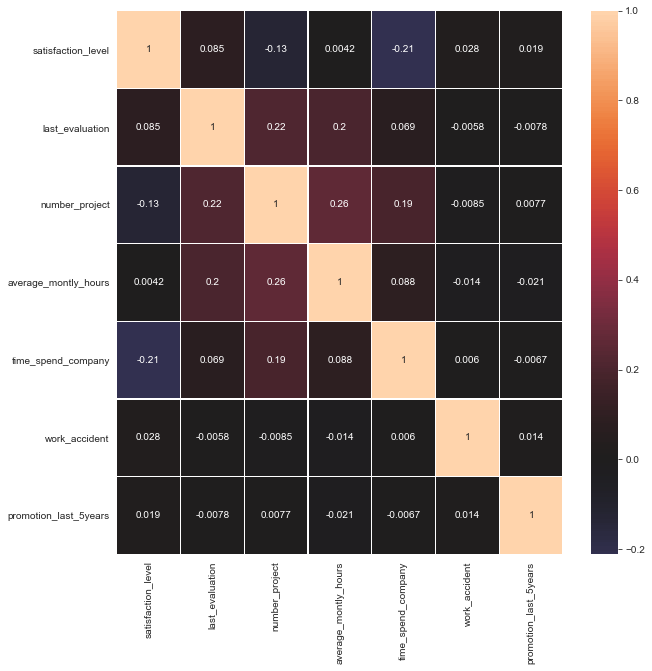

In [15]:
# Creating a heatmap of the attributes in the dataset
color = sns.color_palette()
sns.set_style('darkgrid')
correlation_matrix = data2.corr()   
plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, center=0, annot=True, linewidths=.3)

In [16]:
# Divide the data into training set(80%) and test set(20%)
from sklearn.model_selection import train_test_split 

# Uniform sampling
train_uni, test_uni = train_test_split(data2, test_size=0.2) 

# Stratified sampling based on the ratio of "yes" and "no" values of feature "left
train_strat, test_strat = train_test_split(data2, test_size=0.2, stratify=data2['left']) 


In [17]:
# Show the number of data points
print("-------Train Stratified sampling------")
print(train_strat.head(5))
print("-------Test Stratified sampling-------")
print(test_strat.head(5))
print("-------Train Uniform sampling-------")
print(train_uni.head(5))
print("-------Test Uniform sampling---------")
print(test_uni.head(5))

-------Train Stratified sampling------
       satisfaction_level  last_evaluation  number_project  \
6073                 0.92             0.84               4   
819                  0.45             0.51               2   
9191                 0.32             0.95               2   
10468                0.54             0.71               3   
8038                 0.86             0.57               4   

       average_montly_hours  time_spend_company  work_accident left  \
6073             200.093792                 3.0              0    0   
819              138.000000                 3.0              0    1   
9191             184.000000                 5.0              0    0   
10468            145.000000                 3.0              1    0   
8038             183.000000                 3.0              0    0   

       promotion_last_5years department  salary  
6073                       0  technical     low  
819                        0  technical     low  
9191       

In [2]:
import pandas as fu
data = fu.read_csv('titanic_dataset.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
